## Explorando dados com Python - visualize dados

Neste caderno, aplicaremos técnicas básicas para analisar dados com estatísticas básicas e visualizar usando gráficos.


## Carregando nossos dados

Antes de ser, vamos carregar os mesmos dados sobre horas de estudo que analisamos no caderno anterior. Também vamos recalcular quem passou da mesma forma que da última vez. Execute o código na célula abaixo clicando no botão ► Executar para ver os dados.

In [1]:
import pandas as pd

# Load data from a text file
grad = f'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv'
df_students = pd.read_csv(grad, delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students 

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


## Visualizando dados com Matplotlib

Os DataFrames fornecem uma ótima maneira de explorar e analisar dados tabulares, mas às vezes uma imagem vale mais que mil linhas e colunas. A biblioteca Matplotlib fornece a base para plotar visualizações de dados que podem melhorar muito sua capacidade de analisar os dados.

Vamos começar com um gráfico de barras simples que mostra a nota de cada aluno.

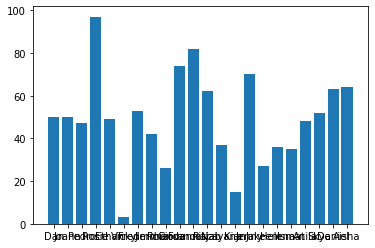

In [2]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

Bem, isso funcionou; mas o gráfico pode ter algumas melhorias para deixar mais claro o que estamos vendo.

Observe que você usou a classe pyplot do Matplotlib para traçar o gráfico. Esta classe fornece várias maneiras de melhorar os elementos visuais da trama. Por exemplo, o seguinte código:

Especifica a cor do gráfico de barras.

Adiciona um título ao gráfico (para que saibamos o que ele representa)

Adiciona rótulos ao X e Y (para que saibamos qual eixo mostra quais dados)

Adiciona uma grade (para facilitar a determinação dos valores das barras)

Gira os marcadores X (para que possamos lê-los)

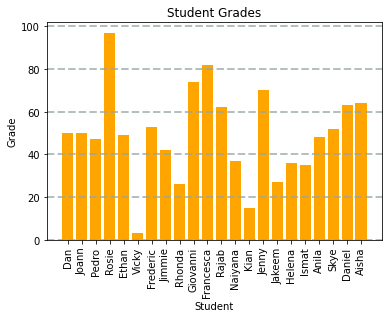

In [3]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

Um gráfico está tecnicamente contido com uma Figura . Nos exemplos anteriores, a figura foi criada implicitamente para você; mas você pode criá-lo explicitamente. Por exemplo, o código a seguir cria uma figura com um tamanho específico.



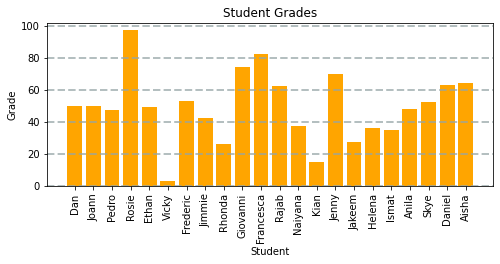

In [4]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

Uma figura pode conter várias subtramas, cada uma em seu próprio eixo .

Por exemplo, o código a seguir cria uma figura com duas subtramas - uma é um gráfico de barras mostrando as notas dos alunos e a outra é um gráfico de pizza comparando o número de notas aprovadas com as notas não aprovadas.

C:\Users\lindb\AppData\Local\Temp\ipykernel_3632\2786848323.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\lindb\AppData\Local\Temp\ipykernel_3632\2786848323.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


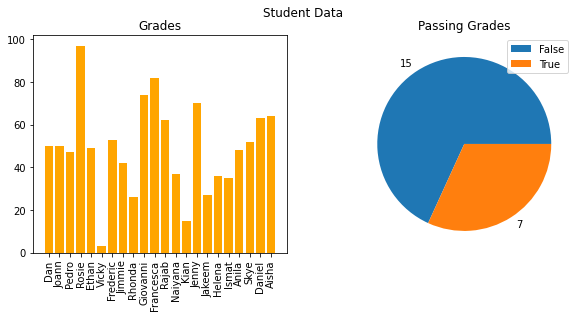

In [5]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

Até agora, você usou métodos do objeto Matplotlib.pyplot para plotar gráficos. No entanto, Matplotlib é tão fundamental para gráficos em Python que muitos pacotes, incluindo Pandas, fornecem métodos que abstraem as funções subjacentes do Matplotlib e simplificam a plotagem. Por exemplo, o DataFrame fornece seus próprios métodos para plotar dados, conforme mostrado no exemplo a seguir para plotar um gráfico de barras de horas de estudo.

<AxesSubplot:xlabel='Name'>

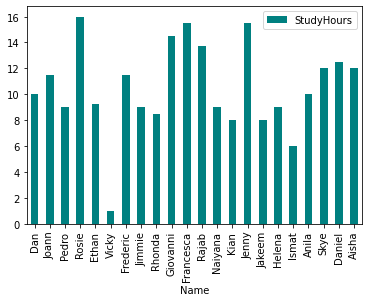

In [6]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

## Introdução à análise estatística

Agora que você sabe como usar o Python para manipular e visualizar dados, pode começar a analisá-los.

Muita ciência de dados está enraizada em estatísticas , então vamos explorar algumas técnicas estatísticas básicas.

#### Nota : 
Este não pretende ensinar estatística - esse é um tópico muito grande para este notebook. No entanto, ele apresentará alguns conceitos e técnicas estatísticas que os cientistas de dados usam à medida que exploram os dados na preparação para a modelagem de aprendizado de máquina.



## Estatísticas descritivas e distribuição de dados

Ao examinar uma variável (por exemplo, uma amostra de notas de alunos), os cientistas de dados estão particularmente interessados em sua distribuição (em outras palavras, como todos os diferentes valores de notas estão espalhados pela amostra). O ponto de partida para essa exploração geralmente é visualizar os dados como um histograma e ver com que frequência cada valor da variável ocorre.

C:\Users\lindb\AppData\Local\Temp\ipykernel_3632\4182697007.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


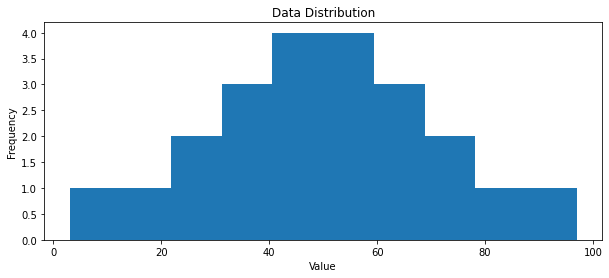

In [7]:
# Get the variable to examine
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

O histograma para notas é uma forma simétrica, onde as notas que ocorrem com mais frequência tendem a estar no meio da faixa (em torno de 50), com menos notas nos extremos da escala.



## Medidas de tendência central

Para entender melhor a distribuição, podemos examinar as chamadas medidas de tendência central ; que é uma maneira elegante de descrever estatísticas que representam o "meio" dos dados. O objetivo disso é tentar encontrar um valor "típico". Maneiras comuns de definir o meio dos dados incluem:

A média : Uma média simples baseada na soma de todos os valores no conjunto de amostras e, em seguida, na divisão do total pelo número de amostras.

A mediana : O valor no meio do intervalo de todos os valores da amostra.

A moda : O valor que ocorre com mais frequência no conjunto de amostras*.

Vamos calcular esses valores, juntamente com os valores mínimo e máximo para comparação, e mostrá-los no histograma.


##### * Claro, em alguns conjuntos de amostra, pode haver um empate para o valor mais comum - nesse caso, o conjunto de dados é descrito como bimodal ou mesmo multimodal .

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\lindb\AppData\Local\Temp\ipykernel_3632\2664441753.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


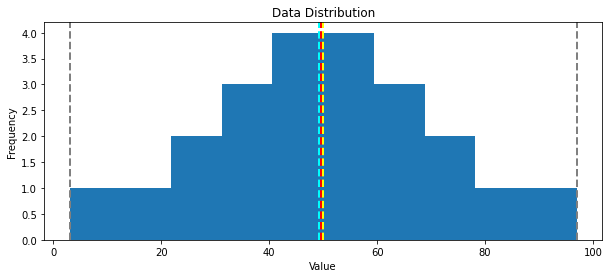

In [8]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

Para os dados de notas, a média, a mediana e a moda parecem estar mais ou menos no meio do mínimo e do máximo, em torno de 50.

Outra maneira de visualizar a distribuição de uma variável é usar um gráfico de caixa (às vezes chamado de gráfico de caixa e bigodes ). Vamos criar um para os dados de notas.

C:\Users\lindb\AppData\Local\Temp\ipykernel_3632\4088679524.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


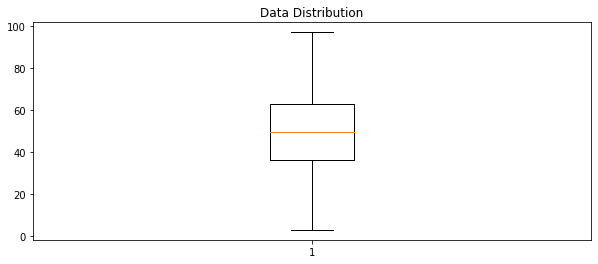

In [9]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

O gráfico de caixa mostra a distribuição dos valores de notas em um formato diferente do histograma. A parte da caixa do gráfico mostra onde os dois quartis internos dos dados residem - então, neste caso, metade das notas estão entre aproximadamente 36 e 63. Os bigodes que se estendem da caixa mostram os dois quartis externos; então a outra metade das notas neste caso estão entre 0 e 36 ou 63 e 100. A linha na caixa indica o valor mediano .

Para aprender, pode ser útil combinar histogramas e gráficos de caixa, com a orientação do gráfico de caixa alterada para alinhá-lo com o histograma (em alguns aspectos, pode ser útil pensar no histograma como uma visão de "elevação frontal" da distribuição , e o box plot como uma visão "plana" da distribuição de cima.)

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\lindb\AppData\Local\Temp\ipykernel_3632\1918122812.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


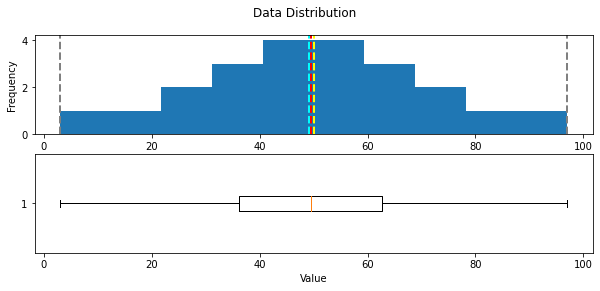

In [10]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

Todas as medidas de tendência central estão bem no meio da distribuição de dados, que é simétrica com valores se tornando progressivamente menores em ambas as direções a partir do meio.

Para explorar essa distribuição com mais detalhes, você precisa entender que a estatística trata fundamentalmente de coletar amostras de dados e usar funções de probabilidade para extrapolar informações sobre a população completa de dados.

O que isto significa? As amostras referem-se aos dados que temos em mãos - como informações sobre os hábitos de estudo e notas desses 22 alunos. A população refere-se a todos os dados possíveis que poderíamos coletar - como as notas de cada aluno e hábitos de estudo em todas as instituições de ensino ao longo da história do tempo. Normalmente estamos interessados na população, mas simplesmente não é prático coletar todos esses dados. Em vez disso, precisamos tentar estimar como é a população a partir da pequena quantidade de dados (amostras) que temos.

Se tivermos amostras suficientes, podemos calcular algo chamado função densidade de probabilidade , que estima a distribuição de notas para toda a população.

A classe pyplot do Matplotlib fornece uma função de plotagem útil para mostrar essa densidade.

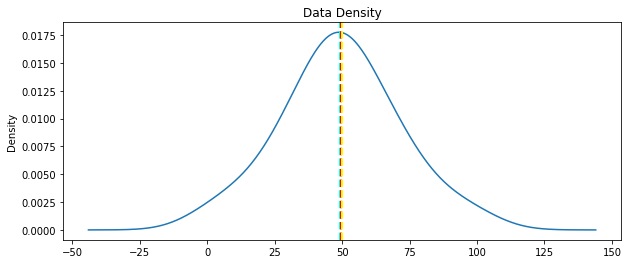

In [11]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)

Como esperado do histograma da amostra, a densidade mostra a característica "curva em sino" do que os estatísticos chamam de distribuição normal com média e moda no centro e caudas simétricas.

## Resumo

Bom trabalho! Havia uma série de novos conceitos aqui, então vamos resumir.

Aqui temos:

1-Gráficos feitos com matplotlib

2-Viu como personalizar esses gráficos

3-Estatísticas básicas calculadas, como medianas

4-Analisamos a disseminação de dados usando gráficos de caixa e histogramas

5-Aprendeu sobre amostras versus populações

6-Estimado como a população de graphse pode parecer a partir de uma amostra de notas.


Em nosso próximo caderno, veremos como identificar dados incomuns e encontrar relacionamentos entre os dados.



## Leitura adicional

Para saber mais sobre os pacotes Python explorados neste notebook, consulte a seguinte documentação:

--NumPyName: https://numpy.org/doc/stable/

--Pandas: https://pandas.pydata.org/pandas-docs/stable/

--Matplotlib: https://matplotlib.org/contents.html